# Summary
In this notebook, we will:
1. Continue our EDA on 911-call dataset
2. Narrow down our analysis to focus on Upper Merion, the town that has the most number of 911 calls to date.
3. Within Upper Merion, we focus on traffic as this is the most popular issues reported in the calls
Through time series analysis, we want to detect a trend in the # of calls related to traffic in Upper Merion in the next few years. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
cwd = os.getcwd()
filepath = cwd+'\\911_new.csv'
filepath

'C:\\Users\\emmyp\\Downloads\\DS 911\\911_new.csv'

In [2]:
df = pd.read_csv(filepath)

In [3]:
df.head(4)

,Unnamed: 0,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,dayofweek,year,date
0,0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10,3,2015,2015-12-10
1,1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10,3,2015,2015-12-10
2,2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,10,3,2015,2015-12-10
3,3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,10,3,2015,2015-12-10


# EDA [Part 2]
Select top 5 towns with most 911 calls

In [4]:
town = df['twp'].value_counts().head(5).index.tolist()

In [5]:
df_twp = df[df.twp.isin(town)]
df_twp

,Unnamed: 0,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,dayofweek,year,date
2,2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,10,3,2015,2015-12-10
3,3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,10,3,2015,2015-12-10
13,13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:12:47,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic,17,12,10,3,2015,2015-12-10
14,14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:09:49,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1,Traffic,17,12,10,3,2015,2015-12-10
18,18,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; Station 308A; ...,19401.0,EMS: VEHICLE ACCIDENT,2015-12-10 17:43:29,NORRISTOWN,PENN ST & ARCH ST,1,EMS,17,12,10,3,2015,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423838,423838,40.102006,-75.094600,COATES RD & MEETINGHOUSE RD; ABINGTON; 2018-11...,19046.0,Traffic: DISABLED VEHICLE -,2018-11-16 06:56:46,ABINGTON,COATES RD & MEETINGHOUSE RD,1,Traffic,6,11,16,4,2018,2018-11-16
423847,423847,40.068910,-75.122158,MILL RD & HARRISON AVE; CHELTENHAM; 2018-11-16...,19027.0,Traffic: DISABLED VEHICLE -,2018-11-16 07:15:43,CHELTENHAM,MILL RD & HARRISON AVE,1,Traffic,7,11,16,4,2018,2018-11-16
423861,423861,40.023949,-75.323397,LANCASTER AVE & THOMAS AVE; LOWER MERION; 2018...,19010.0,Fire: APPLIANCE FIRE,2018-11-16 07:42:43,LOWER MERION,LANCASTER AVE & THOMAS AVE,1,Fire,7,11,16,4,2018,2018-11-16
423880,423880,40.089043,-75.154857,RICES MILL RD & W CHURCH RD; CHELTENHAM; 2018-...,19095.0,Traffic: ROAD OBSTRUCTION -,2018-11-16 08:18:08,CHELTENHAM,RICES MILL RD & W CHURCH RD,1,Traffic,8,11,16,4,2018,2018-11-16


### Plot the # of 911 calls from these towns and reasons

[Text(0, 0, 'LOWER MERION'),
 Text(0, 0, 'ABINGTON'),
 Text(0, 0, 'NORRISTOWN'),
 Text(0, 0, 'UPPER MERION'),
 Text(0, 0, 'CHELTENHAM')]

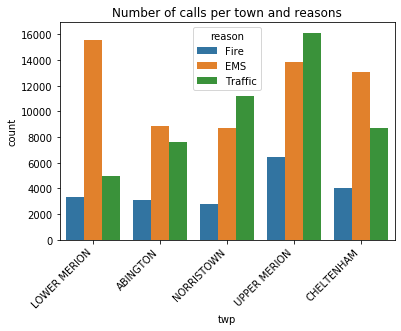

In [6]:
ax = sns.countplot(x='twp', hue ='reason', data=df_twp)
plt.title('Number of calls per town and reasons')
ax.set_xticklabels(town, rotation = 45, ha="right")

As seen above, UPPER MERION has the most calls related to traffic and fire issues, LOWER MERION has the most calls related to EMS issues. For the next analysis, we would focus on UPPER MERION and TRAFFIC issues only.

In [7]:
df_tra_um = df_twp[df_twp['twp'] =='UPPER MERION']
df_tra_um = df_tra_um[df_tra_um['reason'] =='Traffic']
df_tra_um

,Unnamed: 0,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,dayofweek,year,date
14,14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:09:49,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1,Traffic,17,12,10,3,2015,2015-12-10
28,28,40.097222,-75.376195,SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:05:39,UPPER MERION,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,1,Traffic,18,12,10,3,2015,2015-12-10
30,30,40.097222,-75.376195,SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:07:01,UPPER MERION,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,1,Traffic,18,12,10,3,2015,2015-12-10
41,41,40.091055,-75.384365,ALLENDALE RD & WILLS BLVD; UPPER MERION; 2015-...,19406.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:37:00,UPPER MERION,ALLENDALE RD & WILLS BLVD,1,Traffic,18,12,10,3,2015,2015-12-10
161,161,40.079443,-75.331833,RENAISSANCE BLVD & SWEDELAND RD; UPPER MERION;...,19406.0,Traffic: VEHICLE ACCIDENT -,2015-12-11 07:28:48,UPPER MERION,RENAISSANCE BLVD & SWEDELAND RD,1,Traffic,7,12,11,4,2015,2015-12-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423595,423595,40.097222,-75.376195,RAMP RT202 SB TO SCHUYLKILL PKWY & RT202 BYP S...,NaN,Traffic: VEHICLE ACCIDENT -,2018-11-15 19:13:43,UPPER MERION,RAMP RT202 SB TO SCHUYLKILL PKWY & RT202 BYP SB,1,Traffic,19,11,15,3,2018,2018-11-15
423596,423596,40.097222,-75.376195,RAMP RT202 SB TO SCHUYLKILL PKWY & RT202 BYP S...,NaN,Traffic: VEHICLE ACCIDENT -,2018-11-15 19:20:34,UPPER MERION,RAMP RT202 SB TO SCHUYLKILL PKWY & RT202 BYP SB,1,Traffic,19,11,15,3,2018,2018-11-15
423643,423643,40.068298,-75.341255,S GULPH RD & RAMP S GULPH RD TO I76 EB; UPPER ...,NaN,Traffic: VEHICLE ACCIDENT -,2018-11-15 19:56:03,UPPER MERION,S GULPH RD & RAMP S GULPH RD TO I76 EB,1,Traffic,19,11,15,3,2018,2018-11-15
423661,423661,40.062945,-75.339313,REBEL HILL RD & LEMONTON CT; UPPER MERION; 201...,19428.0,Traffic: DISABLED VEHICLE -,2018-11-15 20:18:22,UPPER MERION,REBEL HILL RD & LEMONTON CT,1,Traffic,20,11,15,3,2018,2018-11-15


In [8]:
df_tra_um['issue'] = df_tra_um['title'].apply(lambda x: x.split(': ')[1].split(' -')[0] )
issue_list = df_tra_um['issue'].unique().tolist()
issue_list

['VEHICLE ACCIDENT',
 'DISABLED VEHICLE',
 'ROAD OBSTRUCTION',
 'VEHICLE FIRE',
 'HAZARDOUS ROAD CONDITIONS',
 'DEBRIS/FLUIDS ON HIGHWAY',
 'VEHICLE LEAKING FUEL']

[Text(0, 0, 'VEHICLE ACCIDENT'),
 Text(0, 0, 'DISABLED VEHICLE'),
 Text(0, 0, 'ROAD OBSTRUCTION'),
 Text(0, 0, 'VEHICLE FIRE'),
 Text(0, 0, 'HAZARDOUS ROAD CONDITIONS'),
 Text(0, 0, 'DEBRIS/FLUIDS ON HIGHWAY'),
 Text(0, 0, 'VEHICLE LEAKING FUEL')]

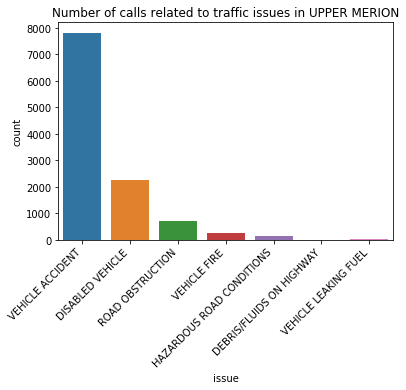

In [9]:
ax = sns.countplot(x = 'issue', data = df_tra_um)
plt.title('Number of calls related to traffic issues in UPPER MERION')
ax.set_xticklabels(issue_list,rotation=45, ha="right" )

This chart shows that VEHICAL ACCIDENT accounts for most of traffic-related 911 calls in UPPER MERION. We would focus our analysis on this specific issue for now.

In [10]:
df_um_acc = df_tra_um[df_tra_um['issue'] == 'VEHICLE ACCIDENT']
df_um_acc.head(7)

,Unnamed: 0,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,dayofweek,year,date,issue
14,14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:09:49,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1,Traffic,17,12,10,3,2015,2015-12-10,VEHICLE ACCIDENT
28,28,40.097222,-75.376195,SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:05:39,UPPER MERION,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,1,Traffic,18,12,10,3,2015,2015-12-10,VEHICLE ACCIDENT
30,30,40.097222,-75.376195,SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:07:01,UPPER MERION,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,1,Traffic,18,12,10,3,2015,2015-12-10,VEHICLE ACCIDENT
41,41,40.091055,-75.384365,ALLENDALE RD & WILLS BLVD; UPPER MERION; 2015-...,19406.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:37:00,UPPER MERION,ALLENDALE RD & WILLS BLVD,1,Traffic,18,12,10,3,2015,2015-12-10,VEHICLE ACCIDENT
161,161,40.079443,-75.331833,RENAISSANCE BLVD & SWEDELAND RD; UPPER MERION;...,19406.0,Traffic: VEHICLE ACCIDENT -,2015-12-11 07:28:48,UPPER MERION,RENAISSANCE BLVD & SWEDELAND RD,1,Traffic,7,12,11,4,2015,2015-12-11,VEHICLE ACCIDENT
323,323,40.097222,-75.376195,SCHUYLKILL EXPY & RR OVERPASS; UPPER MERION; 2...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-11 15:41:06,UPPER MERION,SCHUYLKILL EXPY & RR OVERPASS,1,Traffic,15,12,11,4,2015,2015-12-11,VEHICLE ACCIDENT
372,372,40.090397,-75.395733,MALL BLVD & GODDARD BLVD; UPPER MERION; 2015-1...,19406.0,Traffic: VEHICLE ACCIDENT -,2015-12-11 17:11:53,UPPER MERION,MALL BLVD & GODDARD BLVD,1,Traffic,17,12,11,4,2015,2015-12-11,VEHICLE ACCIDENT


Plot to check if there is any seasonal pattern.

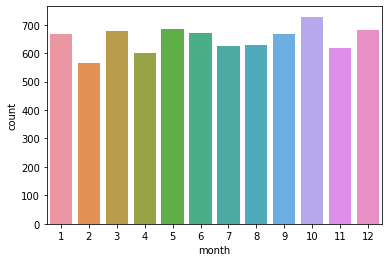

In [11]:
sns.countplot(x ='month', data = df_um_acc)

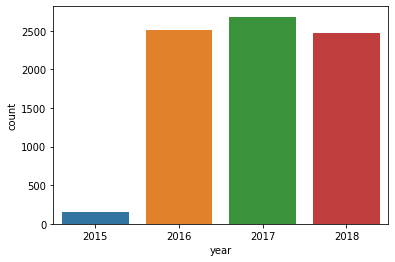

In [12]:
sns.countplot(x ='year', data = df_um_acc)

# Time series analysis by dates

We do this analysis for UPPER MERIAN and focus only on traffic-related calls.

In [13]:
indexed_df = df_um_acc.groupby(['date']).count()['lat']

In [14]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
#Define a function that plots the moving average and moving std
def plot_movingavg(data,winnum):
    rolmean = data.rolling(window=winnum).mean()
    rolstd = data.rolling(window=winnum).std()

    plt.figure(figsize=(20,10))

    ig, ax = plt.subplots(figsize=(20, 5))
    mean = ax.plot(rolmean, color='red',label='Rolling mean')
    std = ax.plot(rolstd, color = 'black',label ='Rolling std')
    org = ax.plot(data, color='blue', label ='Original')

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

    plt.title('Rolling mean and standard deviation')
    plt.legend(loc= 'best')
    plt.show(block=False)

In [15]:
#Define a function that performs Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

def DF_test(data, winnum):
    dftest = adfuller(data, autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used', 'Num of obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print('Results of Dickey-Fuller test:')    
    print(dfoutput)

<Figure size 1440x720 with 0 Axes>

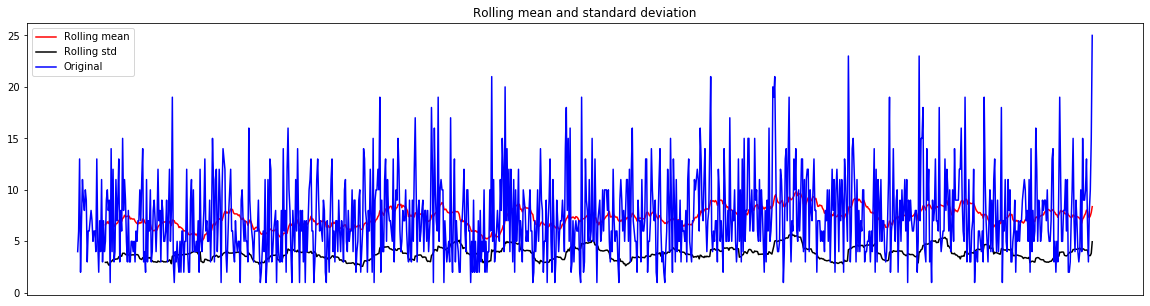

In [16]:
plot_movingavg(indexed_df, 30)

In [18]:
DF_test(indexed_df[0:],30)

Results of Dickey-Fuller test:
Test Statistic         -5.951692e+00
p-value                 2.139705e-07
#Lags Used              1.900000e+01
Num of obs              1.042000e+03
Critical Value (1%)    -3.436641e+00
Critical Value (5%)    -2.864318e+00
Critical Value (10%)   -2.568249e+00
dtype: float64


Based on the Dickey Fuller test, our p-value is fairly small, telling us that our time series is stationary. If it is not yet stationary, we can perform the following transformation:
Take the log_scale of our data, then subtract moving Average from it to get a new variable which is closer to stationary.

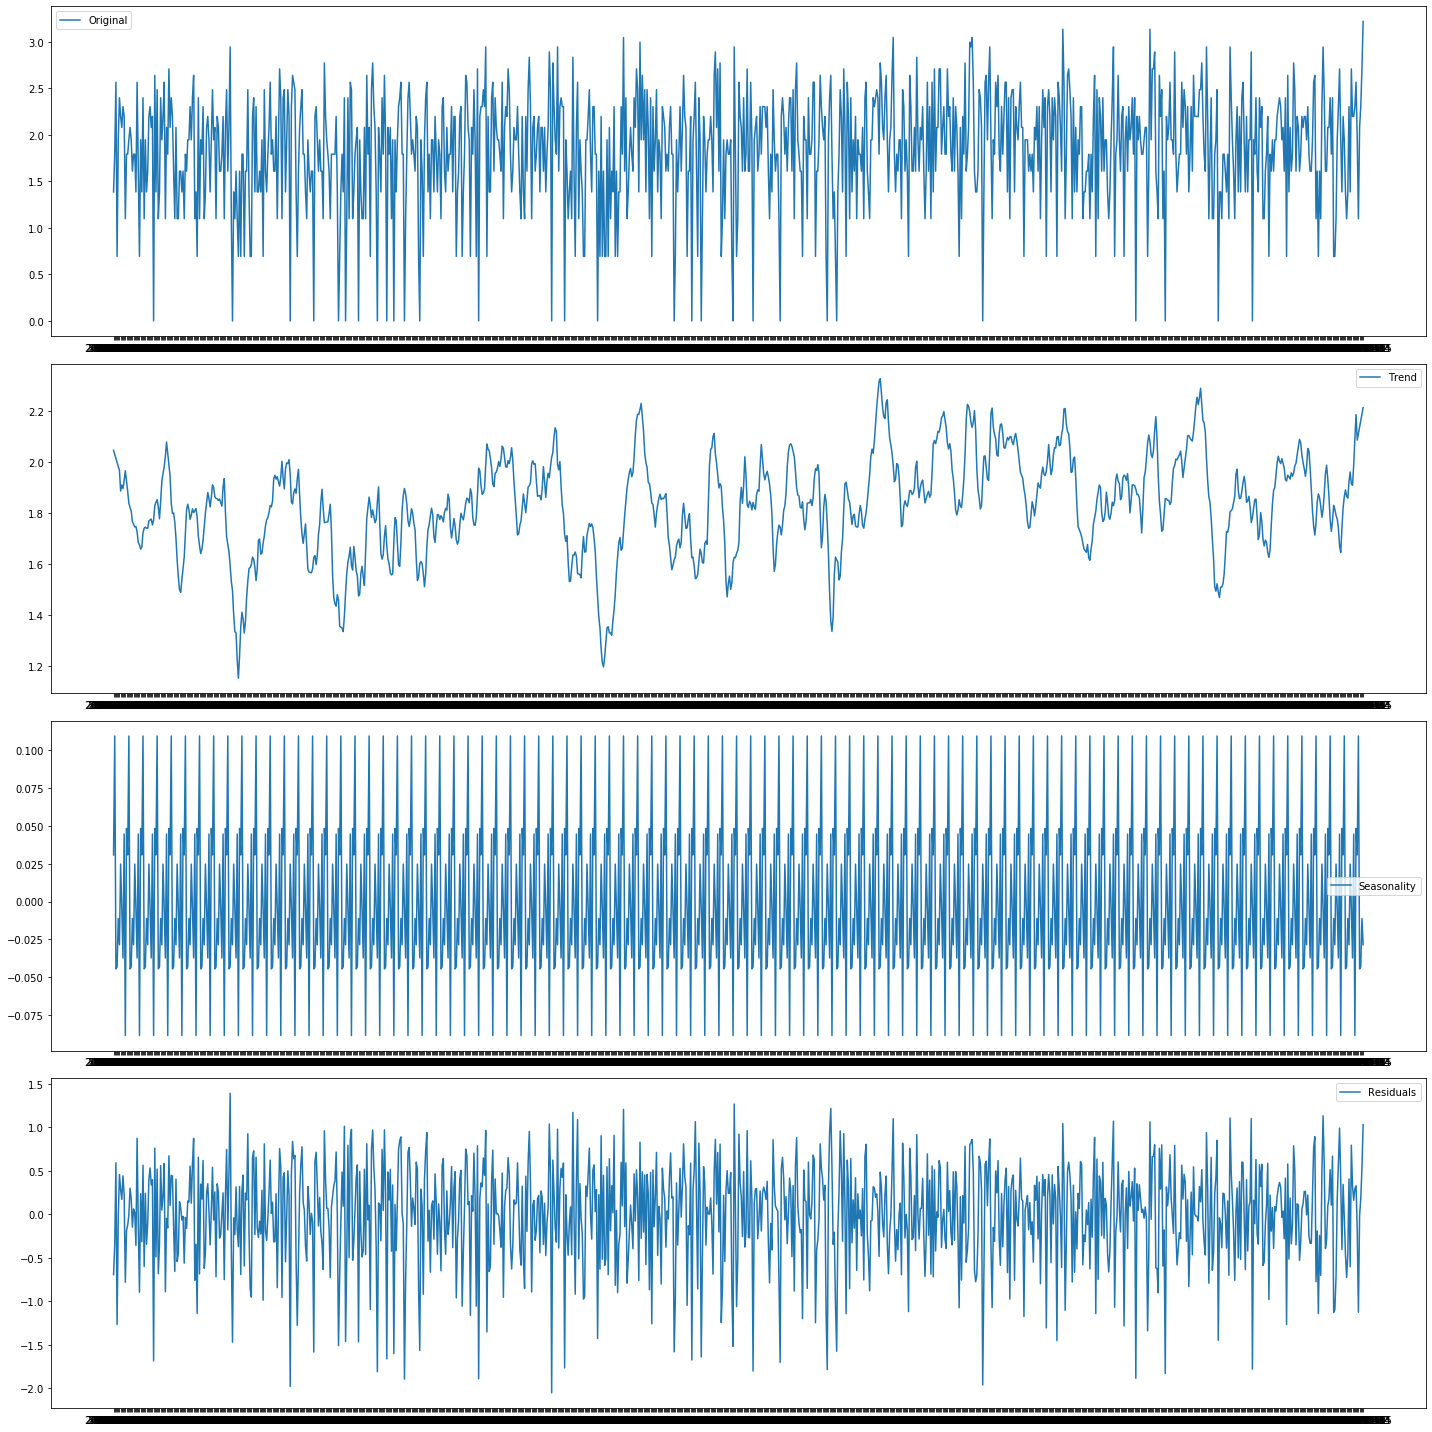

In [213]:
#Check seasonal trends
from statsmodels.tsa.seasonal import seasonal_decompose
indexed_df_log = np.log(indexed_df)

decomposition = seasonal_decompose(indexed_df_log,model='additive',freq=12, extrapolate_trend = 12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20, 20))

plt.subplot(411)
plt.plot(indexed_df_log,label='Original')
plt.legend(loc= 'best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

The trend is not very clear when we do analysis by dates. Next, we'll try the same methods but analyzing by months instead.

# Time series analysis by months

In [20]:
df_um_acc['yearmonth'] = pd.to_datetime(df_um_acc['date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
df_um_acc['yearmonth'] = pd.to_datetime(df_um_acc['yearmonth'])

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df_bymonth = df_um_acc.groupby(['yearmonth']).count()['lat']
df_bymonth = df_bymonth.reset_index()
df_bymonth.head()

,yearmonth,lat
0,2015-12-01,155
1,2016-01-01,225
2,2016-02-01,180
3,2016-03-01,185
4,2016-04-01,201


C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


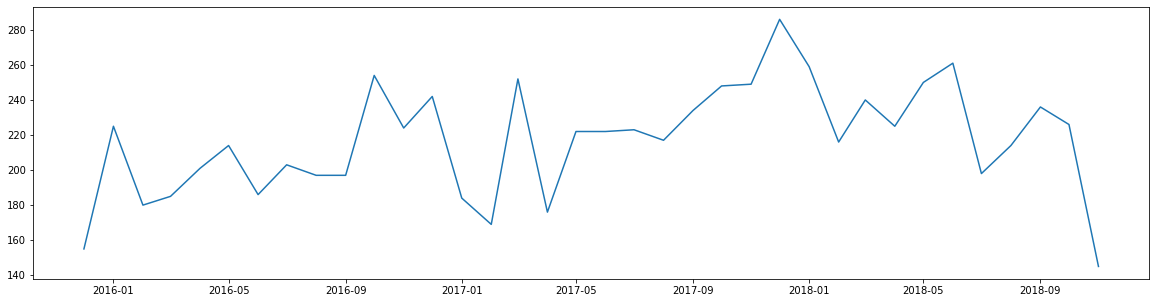

In [22]:
#Plot the data
fig, ax= plt.subplots(figsize =(20,5))
ax.plot(df_bymonth['yearmonth'],df_bymonth['lat'])

#### Plot moving average

<Figure size 1440x720 with 0 Axes>

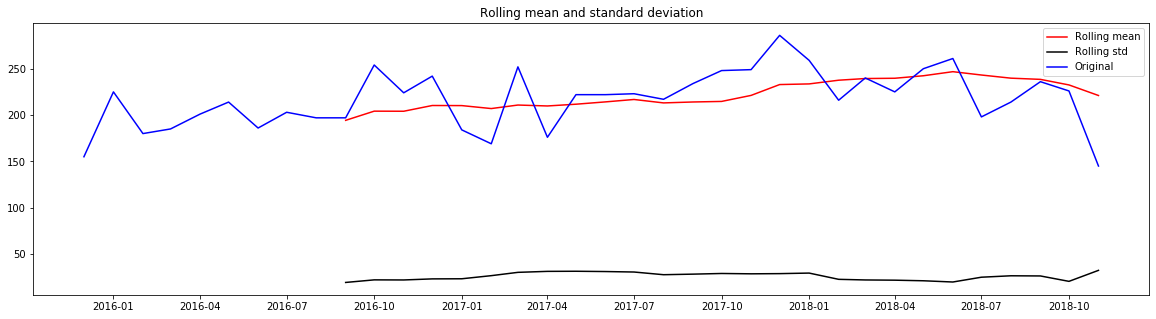

In [23]:
indexed_bymonth = df_bymonth.set_index('yearmonth')
plot_movingavg(indexed_bymonth, 10)

In [25]:
DF_test(indexed_bymonth['lat'],20)

Results of Dickey-Fuller test:
Test Statistic          -4.525925
p-value                  0.000176
#Lags Used               0.000000
Num of obs              35.000000
Critical Value (1%)     -3.632743
Critical Value (5%)     -2.948510
Critical Value (10%)    -2.613017
dtype: float64


The low p-value shows that the time series data is stationary. Next analyze the trends.

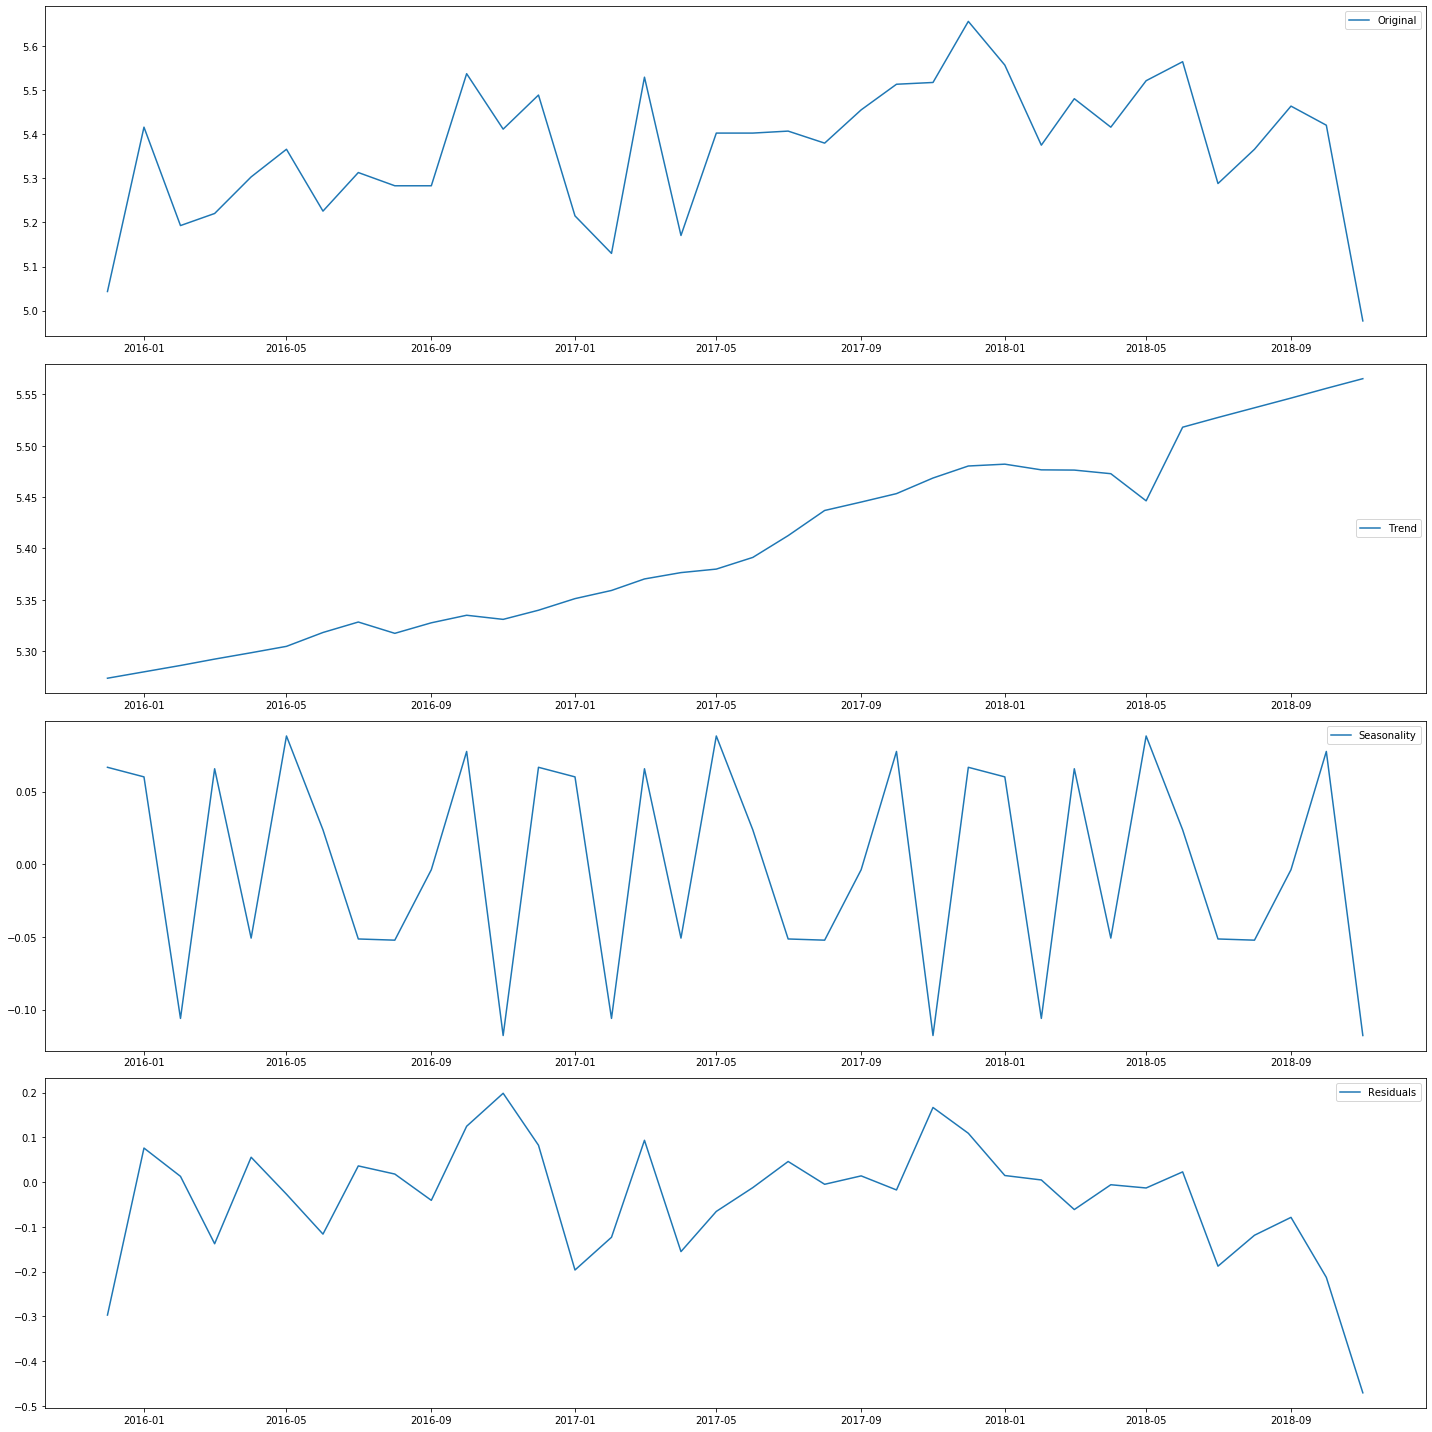

In [26]:
indexed_bymonth_log = np.log(indexed_bymonth)

decomposition = seasonal_decompose(indexed_bymonth_log,model='additive',freq=12, extrapolate_trend = 12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20, 20))

plt.subplot(411)
plt.plot(indexed_bymonth_log,label='Original')
plt.legend(loc= 'best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='center right')

plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

The trend shows that the 911 calls related to traffic increases over time.

<Figure size 1440x720 with 0 Axes>

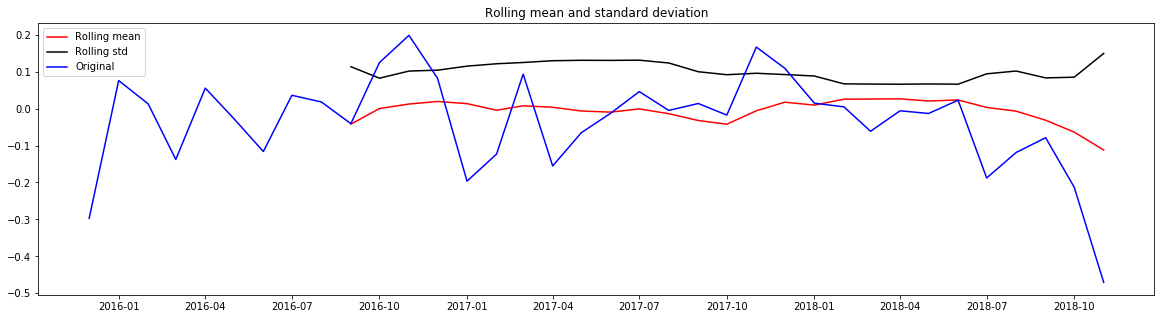

In [27]:
decomposedLogData = residual
plot_movingavg(decomposedLogData,10)

#### Autocorrelation Function

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


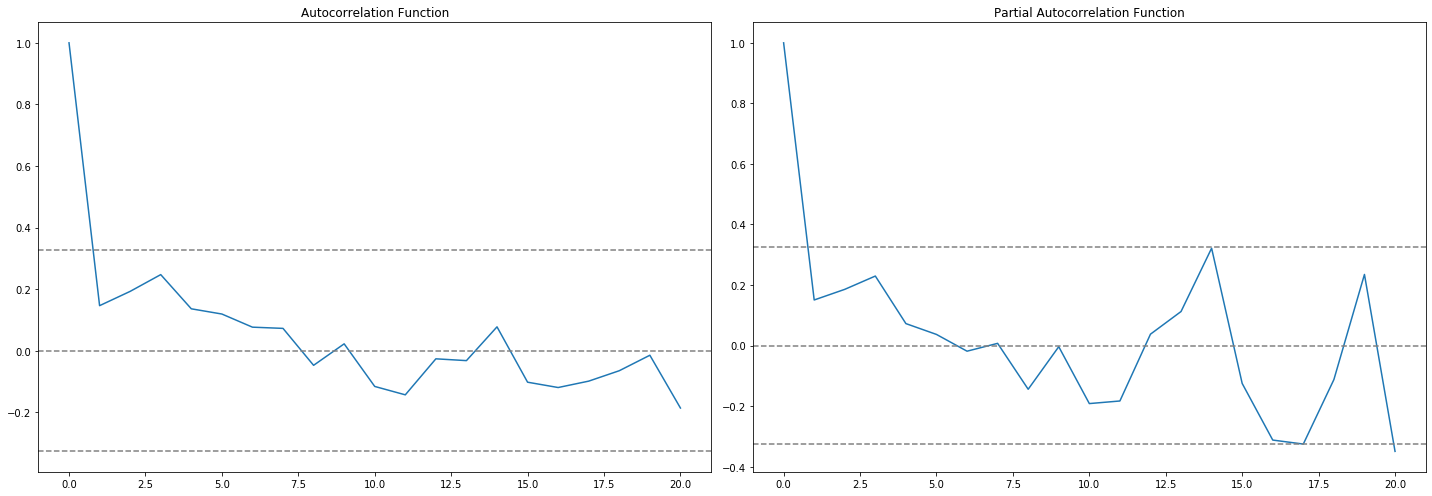

In [28]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexed_bymonth_log, nlags = 20)
lag_pacf = pacf(indexed_bymonth_log, nlags = 20)

#Plot acf - autocorrelation function
plt.figure(figsize=(20,7))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexed_bymonth_log)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexed_bymonth_log)), linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot pacf - partial autocorrelation function
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexed_bymonth_log)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexed_bymonth_log)), linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

###  ARIMA (Auto-regressive + Moving-average)

A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where: p is the number of autoregressive terms, d is the number of nonseasonal differences needed for stationarity, and. q is the number of lagged forecast errors in the prediction equation.
Check out for more details of choosing the orders: https://people.duke.edu/~rnau/411arim2.htm

In [51]:
#Select data difference

indexed_bymonth_diffshift = indexed_bymonth_log - indexed_bymonth_log.shift().fillna(0)

indexed_bymonth_diffshift = indexed_bymonth_diffshift[1:]
#Check DF test
DF_test(indexed_bymonth_diffshift['lat'],10)


Results of Dickey-Fuller test:
Test Statistic         -6.161659e+00
p-value                 7.149673e-08
#Lags Used              1.000000e+00
Num of obs              3.300000e+01
Critical Value (1%)    -3.646135e+00
Critical Value (5%)    -2.954127e+00
Critical Value (10%)   -2.615968e+00
dtype: float64


<Figure size 1440x720 with 0 Axes>

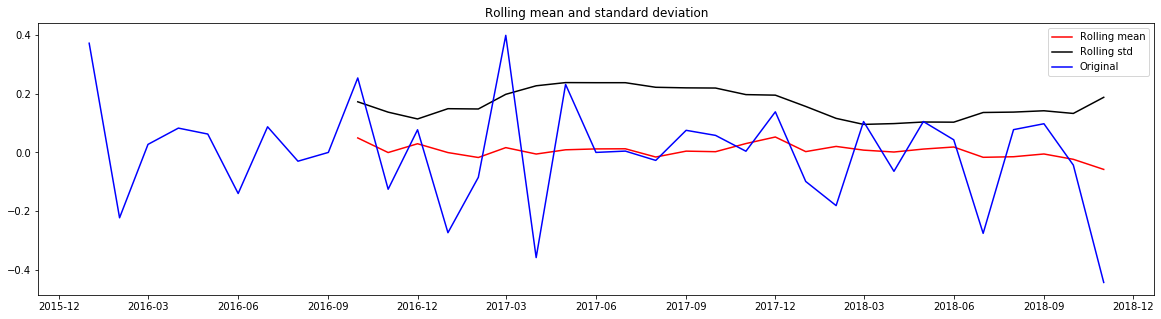

In [52]:
#Plot of moving average
plot_movingavg(indexed_bymonth_diffshift, 10)

Both our moving average and moving std are flat - meaning that our data is stationary.

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


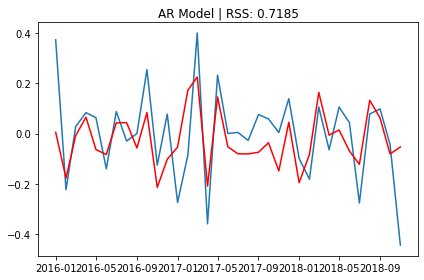

In [171]:
from statsmodels.tsa.arima_model import ARIMA
#AR model

model = ARIMA(indexed_bymonth_log, order= [12,1,2])
results_AR = model.fit()

fitted_values = results_AR.fittedvalues
plt.plot(indexed_bymonth_diffshift)
plt.plot(fitted_values, color='red')
plt.title('AR Model | RSS: %.4f'% sum((fitted_values - indexed_bymonth_diffshift['lat']).dropna()**2))
plt.tight_layout()

The RSS - residual sum of squared are 0.79 which is not bad. The lower the RSS is the better our model.

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


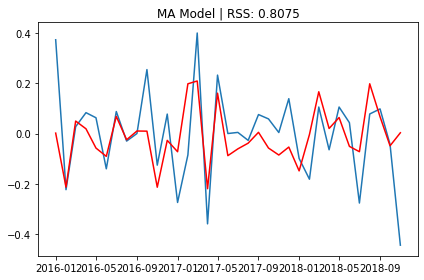

In [172]:
# MA Model
model = ARIMA(indexed_bymonth_log, order= [0,1,2])
results_MA = model.fit()

fitted_values = results_MA.fittedvalues
plt.plot(indexed_bymonth_diffshift)
plt.plot(fitted_values, color='red')
plt.title('MA Model | RSS: %.4f'% sum((fitted_values - indexed_bymonth_diffshift['lat']).dropna()**2))
plt.tight_layout()

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


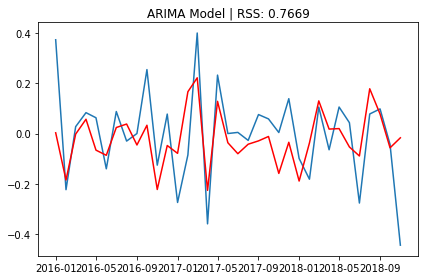

In [206]:
# ARIMA Model
model = ARIMA(indexed_bymonth_log, order= (7,1,2))
results_ARIMA = model.fit(disp = False)

fitted_values = results_ARIMA.fittedvalues
plt.plot(indexed_bymonth_diffshift)
plt.plot(fitted_values, color='red')
plt.title('ARIMA Model | RSS: %.4f'% sum((fitted_values - indexed_bymonth_diffshift['lat']).dropna()**2))
plt.tight_layout()

### Give predictions

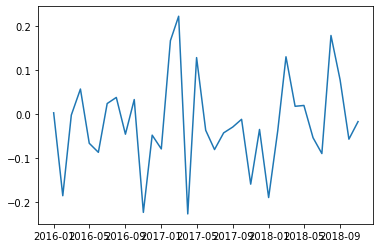

In [207]:
predictions_ARIMA_diff = pd.Series(fitted_values,copy=True)
predictions_ARIMA_diff.head()
plt.plot(predictions_ARIMA_diff)

In [208]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

yearmonth
2016-01-01    0.002976
2016-02-01   -0.181755
2016-03-01   -0.183954
2016-04-01   -0.127221
2016-05-01   -0.193240
dtype: float64


In [209]:
predictions_ARIMA_log= indexed_bymonth_log['lat'].add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

yearmonth
2015-12-01    5.043425
2016-01-01    5.419077
2016-02-01    5.011202
2016-03-01    5.036401
2016-04-01    5.176084
dtype: float64

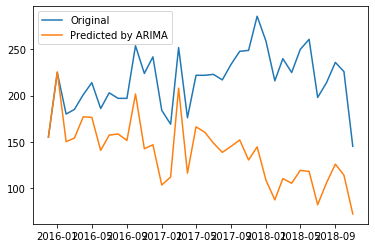

In [210]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexed_bymonth, label='Original')
plt.plot(predictions_ARIMA, label='Predicted by ARIMA')
plt.legend(loc='best')

Make predictions
1. Check how many rows (months in our case) we have in our original data
2. See how many more months we want to predict
3. Add them and fit the sum to our 'predict' function

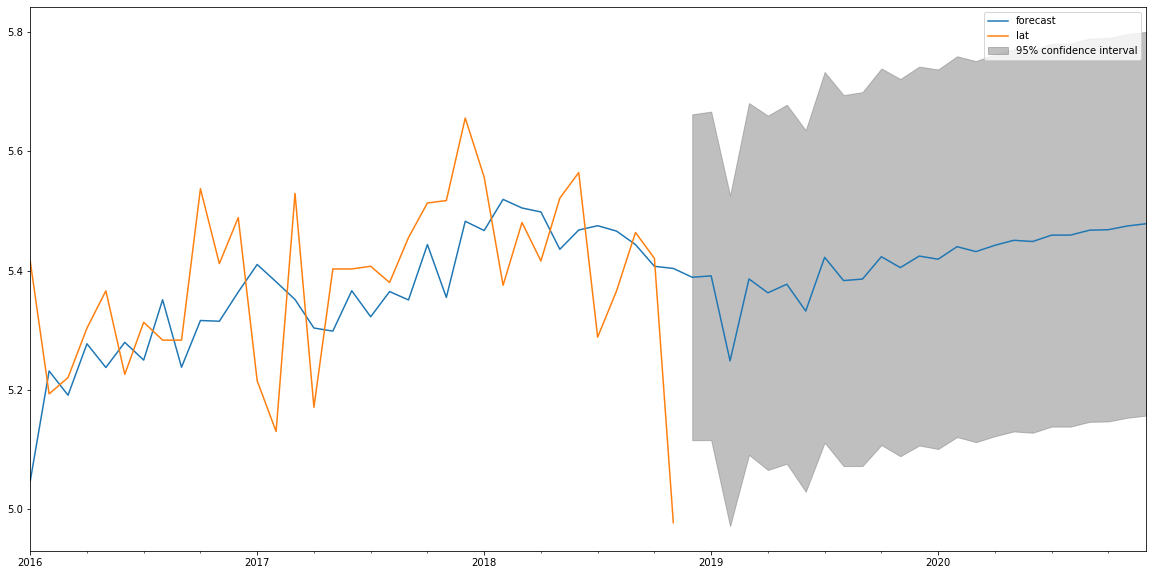

In [212]:
fig, ax = plt.subplots(figsize=(20,10))
results_ARIMA.plot_predict(1,60, ax=ax,alpha=0.05)
x = results_ARIMA.forecast() #24 months ahead

Our predicion aligns with the overall trend detected above, both of which tells us that calls related to traffic slightly increase overtime.

# Conclusion

In this notebook, we have:
1. Continue our EDA on 911-call dataset
2. Narrow down our analysis to focus on Upper Merion, the town that has the most number of 911 calls to date.
3. Within Upper Merion, we focus on traffic as this is the most popular issues reported in the calls
4. Through time series analysis, we see a slight increase in the number of calls related to traffic in Upper Merion. 